# 2. Z-test for two population means (variances known and equal)

## Objective

- To investigate the significance of the difference between the means of two populations.

- In layman terms, this test is asking:
    - We know that there is some difference between 2 population means
    - Has that difference changed?

## Assumptions

- Variance $\sigma^2$ is equal for both populations
- The populations are normally distributed 
    - If not normal, the test may be regarded as approximate
- Sample sizes (both $n_1$ and $n_2$) are sufficiently large for central limit theorem assumption to hold
- All observations in the samples are i.i.d

## Method

- Assume 2 populations with means $\mu_1$ and $\mu_2$
- Take random samples from both populations of sizes $n_1$ and $n_2$
- Using this, we find sample means $\bar{X_1}$ and $\bar{X_2}$
- Then $$Z = \frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sigma \sqrt{(\frac{1}{n_1} + \frac{1}{n_2})}} $$

- As in the case of `Test 1`, the test statistic $Z$ will follow a standard normal distribution if the assumptions hold

### Proof that Z is a gaussian distribution

- By assumption, both $\bar{X_1}$ and $\bar{X_2}$ are normally distributed
    - Therefore $\bar{X_1} - \bar{X_2}$ is also normally distributed
    - Therefore, $Z$ is normally distributed

$$\begin{aligned}
    E[Z] &= E[\frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sigma \sqrt{(\frac{1}{n_1} + \frac{1}{n_2})}}] \\
    &= \frac{1}{\sigma \sqrt{(\frac{1}{n_1} + \frac{1}{n_2})}} \cdot (E[(\bar{X_1} - \bar{X_2})] - (\mu_1 - \mu_2)) \\
    &= \frac{1}{\sigma \sqrt{(\frac{1}{n_1} + \frac{1}{n_2})}} \cdot (E[\bar{X_1}] - E[\bar{X_2}] - (\mu_1 - \mu_2)) \\
    &= \frac{1}{\sigma \sqrt{(\frac{1}{n_1} + \frac{1}{n_2})}} \cdot ((E[\bar{X_1}] - \mu_1) + (\mu_2 - E[\bar{X_2}])) \\
    &= \frac{1}{\sigma \sqrt{(\frac{1}{n_1} + \frac{1}{n_2})}} \cdot (0 + 0) & E[\bar{X_1}] = \mu_1, E[\bar{X_2}] = \mu_2 \text{ under null hypothesis that } \mu_1 - \mu_2 = 0\\
    &= 0

    \\ \\ 

    Var[Z] &= Var[\frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sigma \sqrt{(\frac{1}{n_1} + \frac{1}{n_2})}}] \\
    &= \frac{1}{\sigma^2 (\frac{1}{n_1} + \frac{1}{n_2})} Var[(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)] \\
    &= \frac{1}{\sigma^2 (\frac{1}{n_1} + \frac{1}{n_2})} \cdot (Var[(\bar{X_1} - \bar{X_2})]) \\
    &= \frac{1}{\sigma^2 (\frac{1}{n_1} + \frac{1}{n_2})} \cdot (Var[\bar{X_1}] + Var[\bar{X_2}]) & Var[X+Y] = Var[X] + Var[Y] + 2 Cov[X,Y], Cov[X,Y] = 0 \text{ by i.i.d} \\
    &= \frac{1}{\sigma^2 (\frac{1}{n_1} + \frac{1}{n_2})} \cdot (\frac{\sigma^2}{n_1}  + \frac{\sigma^2}{n_2}) \\
    &= 1
\end{aligned}$$

## Example

- Problem
    - Two teams of financial sales persons are compared to see if it is likely that the training each has received could have led to differing success rates. 
    - A sample of 9 transactions for team 1 yields an average success rate of 1.2. 
    - Similarly a sample of 16 transactions for team 2 yields a success rate of 1.7. 
    - The variances for both teams are equal to 2.0750 (standard deviation 1.4405).
    - The success rate is calculated using a range of output measures for a transaction.
    - It is implied that, in the absence of training, $\mu_1 = \mu_2$. Therefore, we compute the test statistic below with this assumption

- Question
    - Is there a difference between the two teams' performance?
    - Is team 1 better than team 2 after training?
    - Is team 2 better than team 1 after training?

In [19]:
mu1 = 1.2
mu2 = 1.2
xbar1 = 1.2
xbar2 = 1.7

# xbar1 = 1.0
# xbar2 = 1.4
# xbar1 = 1.0
# xbar2 = 1.4
sigma = 1.4405
n1 = 9
n2 = 16

def compute_test_statistic(mu1, mu2, n1, n2, xbar1, xbar2, sigma):
    return ((xbar1 - xbar2) - (mu1 - mu2)) / (sigma * (1/n1 + 1/n2)**0.5)

compute_test_statistic(mu1, mu2, n1, n2, xbar1, xbar2, sigma)

-0.8330440819160013

- Let $\alpha = 0.05$
- Two tailed test: -1.96 < -0.833 < 1.96
    - Do not reject null hypothesis that the difference has not changed
- One tailed test: -1.645 < -0.833
    - Do not reject null hypothesis that the difference has not decreased
- One tailed test: -0.833 < 1.645
    - Do not reject null hypothesis that the difference has not increased

## Proof by simulation that test statistic is normal

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MU1 = 5
MU2 = 3
SIGMA = 2
SAMPLE_SIZE1 = 100
SAMPLE_SIZE2 = 200

xbar1 = np.array([
    np.random.normal(MU1, SIGMA, SAMPLE_SIZE1).mean() for _ in range(10_000)
])

xbar2 = np.array([
    np.random.normal(MU2, SIGMA, SAMPLE_SIZE2).mean() for _ in range(10_000)
])

-0.010476897652720307
1.0270248913457252


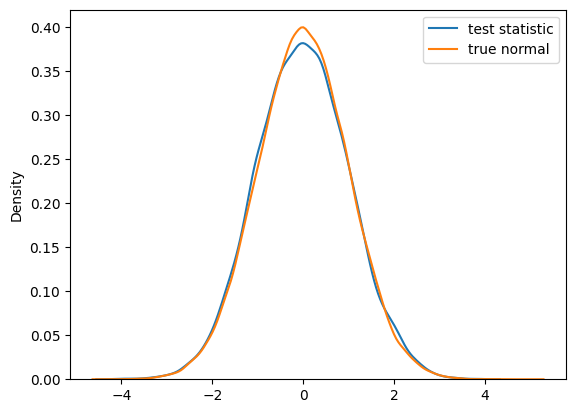

In [19]:
test_statistic_distribution = ((xbar1 - xbar2) - (MU1 - MU2)) / (SIGMA * (1/SAMPLE_SIZE1 + 1/SAMPLE_SIZE2)**0.5)
normal_distribution = np.random.normal(0, 1, 10_0000)
print(test_statistic_distribution.mean())
print(test_statistic_distribution.var())
sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(normal_distribution, label='true normal')
plt.legend()